<a href="https://colab.research.google.com/github/Karan77788/Data_Science/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

In [5]:
df = pd.read_csv("/content/Students_admissions_dataset.csv")


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
df = pd.read_csv("/content/Students_admissions_dataset.csv")
print(df.head())

    GPA  Extracurriculars  Parental_Income  Hours_Studied  \
0  3.28                 0           117196              9   
1  3.47                 5           117080             18   
2  2.06                 0            48657              8   
3  3.12                 5           105181             18   
4  3.18                 0           119458              6   

   Entrance_Test_Score  Distance Internet Final_Result  
0                   61        15      Yes         Fail  
1                   41        38       No         Fail  
2                   94        39      Yes         Fail  
3                   83        15       No         Fail  
4                   84        22       No         Fail  


In [9]:
print(df.tail())

      GPA  Extracurriculars  Parental_Income  Hours_Studied  \
195  2.76                 4            89541             10   
196  2.20                 5            34996             18   
197  3.78                 3            64424             15   
198  2.63                 2           107177              9   
199  2.13                 0            32219             14   

     Entrance_Test_Score  Distance Internet Final_Result  
195                   88        33       No         Fail  
196                   57        28       No         Fail  
197                   81        27      Yes         Pass  
198                   77        10       No         Fail  
199                   42        48       No         Fail  


In [10]:
print(df.isnull().sum())

GPA                    0
Extracurriculars       0
Parental_Income        0
Hours_Studied          0
Entrance_Test_Score    0
Distance               0
Internet               0
Final_Result           0
dtype: int64


In [14]:

df['Internet'] = df['Internet'].map({'Yes': 1, 'No': 0})


X = df.drop('Final_Result', axis=1)
y = df['Final_Result']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


model = DecisionTreeClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.875


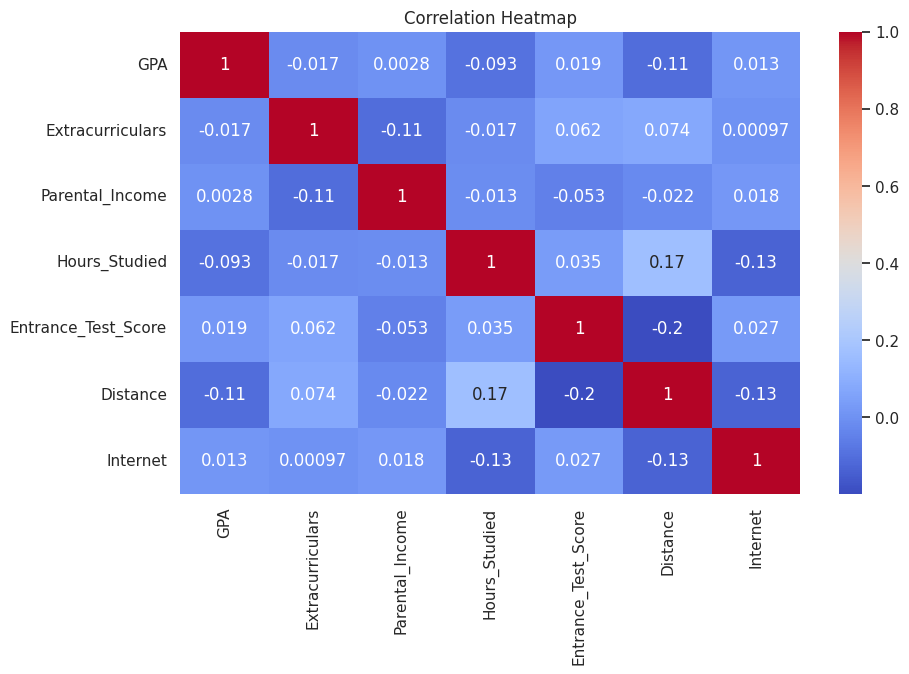

In [15]:
numeric_df = df.drop(columns=['Final_Result'])

if numeric_df['Internet'].dtype == 'object':
    numeric_df['Internet'] = numeric_df['Internet'].map({'Yes': 1, 'No': 0})


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [22]:
log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))

Logistic Regression Accuracy: 0.975


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
import joblib
joblib.dump(model, 'best_model.pkl')

['best_model.pkl']

In [19]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(results.head(50))

    Actual Predicted
60    Fail      Fail
195   Fail      Fail
25    Fail      Fail
15    Fail      Fail
9     Fail      Fail
178   Fail      Fail
136   Fail      Fail
10    Fail      Fail
91    Fail      Fail
67    Pass      Fail
134   Pass      Fail
28    Fail      Fail
171   Fail      Fail
166   Fail      Fail
132   Fail      Fail
121   Fail      Fail
55    Fail      Fail
39    Fail      Fail
102   Fail      Fail
24    Fail      Fail
7     Fail      Pass
186   Fail      Fail
6     Fail      Fail
84    Fail      Fail
63    Fail      Fail
83    Pass      Fail
109   Fail      Fail
142   Fail      Fail
127   Fail      Fail
122   Fail      Fail
50    Fail      Fail
124   Fail      Pass
148   Fail      Fail
82    Fail      Fail
86    Fail      Fail
179   Fail      Fail
143   Fail      Fail
22    Fail      Fail
17    Fail      Fail
170   Fail      Fail


In [30]:
# GPA, Extra Activities, Parental Income, Study Hours, Test Score, Distance, Internet

custom_student = [[8, 9, 700000, 10, 80, 3, 1]]
# Use the original column names from the training data
columns = ['GPA', 'Extracurriculars', 'Parental_Income', 'Hours_Studied', 'Entrance_Test_Score', 'Distance', 'Internet']
custom_df = pd.DataFrame(custom_student, columns=columns)
result = model.predict(custom_df)

if result[0] == 1:
    print("Prediction: The student is likely to PASS ")
else:
    print(" Prediction: The student is likely to FAIL")

 Prediction: The student is likely to FAIL
